In [1]:
# general imports:
%matplotlib inline
import matplotlib, qiskit, pprint, itertools
from matplotlib import pyplot as plt
import numpy as np
from numpy import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, IBMQ, transpile, schedule, assemble
from qiskit.circuit import *
from qiskit.circuit.library.standard_gates import *
from qiskit.providers.aer import QasmSimulator
from qiskit.test.mock import FakeAlmaden, FakeMelbourne
from qiskit.visualization import *
from qiskit.circuit.library import *

In [3]:
# import utils for Quantum Information Scrambling Verification Test:
from QSVT_utils import *

In [4]:
# load account:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# get simulators:
f_alma = FakeAlmaden() # simulator f_alma for pulse schedules
f_mel = FakeMelbourne() # simulator f_mel for simulator backend mel
qasm_simulator = Aer.get_backend('qasm_simulator') 

# Experiment 1: CZ and H Gates

In [5]:
#############################################################################################
########################## DEFINE VARIABLES FOR EXPERIMENTAL SETUP ##########################
#############################################################################################

# size of the scrambling unitary / operator
n = 4

# choose between methods "gateset" and "operator"
method = "gateset"

###### method 1: "gateset" ######
# set two and one qubit gates to be used for scrambling

# define list of two qubit gates for scrambling
two_q_gates = [CZGate()]

# define list of one qubit gates for scrambling
one_q_gates = [HGate()]

###### method 2: "operator" ###### 
# set unitary for n qubits to be used for scrambling
operator = []

In [6]:
#############################################################################################
########################## STRUCTURE CIRC AND PAIRING #######################################
#############################################################################################

# num of qubits in circuit = 1 q for bob + n*2
qnum = 2*n +1

# inums of upper and lower half qubits
fst_half, sec_half = fst_n_sec_half_nums(qnum)

# initial bell pair inums defining the many-body-system
bell_pairs = get_bell_pairs(qnum)

# list of all bell pairs that can be used as basemeas pair
meas_pairs = [x for x in bell_pairs[:-1]]+[[0,qnum-2]] # replace bob and neighbor with alice and bob neighbor

# alice has qubit 0 - bob has qubit with last inum 
inum_alice, inum_bob = 0, qnum-1

# define qubit pair that will be used for base measurement 
# fist pair in the list is the middle pair (furthes away from bob and alice), but any pair will do
basemeas = meas_pairs[0]

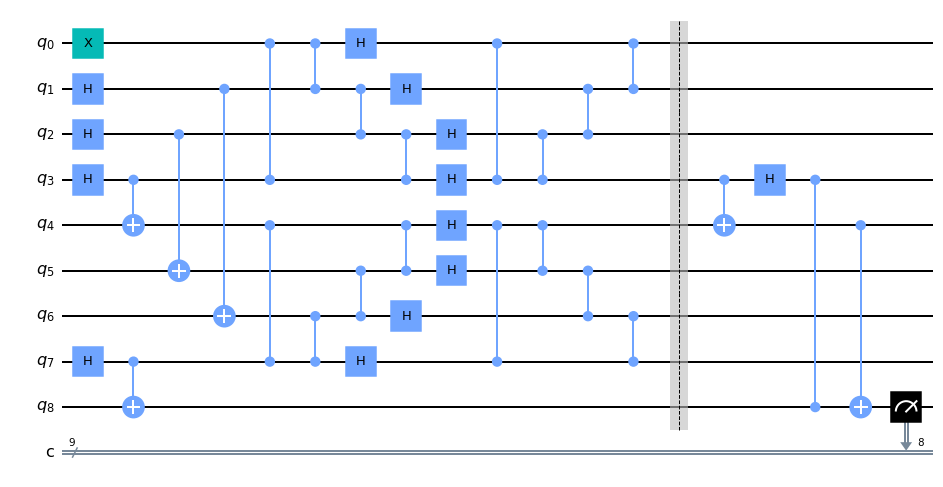

In [7]:
#############################################################################################
########################## GET SCRAMBLING TEST TELPO CIRC  ##################################
#############################################################################################

###################################### STEP 1: PREPARATIONS
#############################################################################################

# initialize circ 
circ = QuantumCircuit(qnum,qnum)

# initialize alice qubit in |1> state
circ.x(inum_alice)

# initialize bell pairs
entangle_bell_pairs(circ, bell_pairs)

###################################### STEP 2: SCRAMBLING PROTOCOL
#############################################################################################

# option 1: apply scrambling via gateset 
if method == "gateset":
    apply_gate_set_test(circ, two_q_gates, one_q_gates)

# option 2: apply scrambling via unitary: 
if method == "unitary":
    apply_unitary_test(circ, unitary)
    
circ.barrier()

###################################### STEP 3: BASE MEASUREMENT OF BELL PAIR
#############################################################################################

# disentangle base meas bell pair
disentangle_bell_pair(circ, basemeas)

###################################### STEP 4: BOB DECODING OF BASE MEASUREMENT
#############################################################################################

# apply decoding from measurement
apply_bob_gates(circ,inum_bob,basemeas)

###################################### STEP 5: BOB MEASUREMENT
#############################################################################################

# measure bob qubit
circ.measure(inum_bob,inum_bob)

#############################################################################################
# see circ
circ.draw('mpl')


 Fidelity Bob Qubit:   	 100.0%


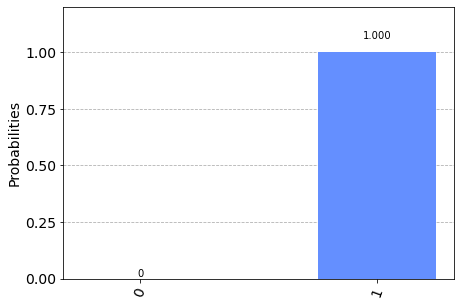

In [8]:
###################################### STEP 6: RUN ON SIMULATOR
#############################################################################################

# choose simulator 
be = qasm_simulator

# run on simulator 
pct = 100
shots = 100*pct
t_qc = transpile(circ, be)
qobj = assemble(t_qc, shots=shots)
result = be.run(qobj).result()

###################################### STEP 7: SEE SIMULATOR RESULTS FOR FIDELITY
#############################################################################################

# see fidelity
bob_1 = sum([v for (k,v) in result.get_counts().items() if k[0]== "1"])
bob_0 = sum([v for (k,v) in result.get_counts().items() if k[0]== "0"])
print("\n Fidelity Bob Qubit:   \t {}%".format(bob_1/pct))
fid_dict = {"1":bob_1,"0":bob_0} # dict for hist plot
plot_histogram(fid_dict)

# Experiment 2: CX and TGates


 Fidelity Bob Qubit:   	 49.56%


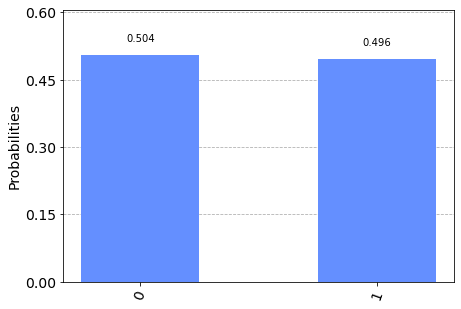

In [9]:
#############################################################################################
########################## DEFINE VARIABLES FOR EXPERIMENTAL SETUP ##########################
#############################################################################################

# size of the scrambling unitary / operator
n = 4

# choose between methods "gateset" and "operator"
method = "gateset"

###### method 1: "gateset" ######
# set two and one qubit gates to be used for scrambling

# define list of two qubit gates for scrambling
two_q_gates = [CXGate()]

# define list of one qubit gates for scrambling
one_q_gates = [TGate()]

###### method 2: "operator" ###### 
# set unitary for n qubits to be used for scrambling
operator = []

#############################################################################################
########################## STRUCTURE CIRC AND PAIRING #######################################
#############################################################################################

# num of qubits in circuit = 1 q for bob + n*2
qnum = 2*n +1

# inums of upper and lower half qubits
fst_half, sec_half = fst_n_sec_half_nums(qnum)

# initial bell pair inums defining the many-body-system
bell_pairs = get_bell_pairs(qnum)

# list of all bell pairs that can be used as basemeas pair
meas_pairs = [x for x in bell_pairs[:-1]]+[[0,qnum-2]] # replace bob and neighbor with alice and bob neighbor

# alice has qubit 0 - bob has qubit with last inum 
inum_alice, inum_bob = 0, qnum-1

# define qubit pair that will be used for base measurement 
# fist pair in the list is the middle pair (furthes away from bob and alice), but any pair will do
basemeas = meas_pairs[0]

#############################################################################################
########################## GET SCRAMBLING TEST TELPO CIRC  ##################################
#############################################################################################

###################################### STEP 1: PREPARATIONS
#############################################################################################

# initialize circ 
circ = QuantumCircuit(qnum,qnum)

# initialize alice qubit in |1> state
circ.x(inum_alice)

# initialize bell pairs
entangle_bell_pairs(circ, bell_pairs)

###################################### STEP 2: SCRAMBLING PROTOCOL
#############################################################################################

# option 1: apply scrambling via gateset 
if method == "gateset":
    apply_gate_set_test(circ, two_q_gates, one_q_gates)

# option 2: apply scrambling via unitary: 
if method == "unitary":
    apply_unitary_test(circ, unitary)
    
circ.barrier()

###################################### STEP 3: BASE MEASUREMENT OF BELL PAIR
#############################################################################################

# disentangle base meas bell pair
disentangle_bell_pair(circ, basemeas)

###################################### STEP 4: BOB DECODING OF BASE MEASUREMENT
#############################################################################################

# apply decoding from measurement
apply_bob_gates(circ,inum_bob,basemeas)

###################################### STEP 5: BOB MEASUREMENT
#############################################################################################

# measure bob qubit
circ.measure(inum_bob,inum_bob)

#############################################################################################
# see circ
#circ.draw('mpl')

###################################### STEP 6: RUN ON SIMULATOR
#############################################################################################

# choose simulator 
be = qasm_simulator

# run on simulator 
pct = 100
shots = 100*pct
t_qc = transpile(circ, be)
qobj = assemble(t_qc, shots=shots)
result = be.run(qobj).result()

###################################### STEP 7: SEE SIMULATOR RESULTS FOR FIDELITY
#############################################################################################

# see fidelity
bob_1 = sum([v for (k,v) in result.get_counts().items() if k[0]== "1"])
bob_0 = sum([v for (k,v) in result.get_counts().items() if k[0]== "0"])
print("\n Fidelity Bob Qubit:   \t {}%".format(bob_1/pct))
fid_dict = {"1":bob_1,"0":bob_0} # dict for hist plot
plot_histogram(fid_dict)

# Experiment 3: SWAP and X Gates


 Fidelity Bob Qubit:   	 100.0%


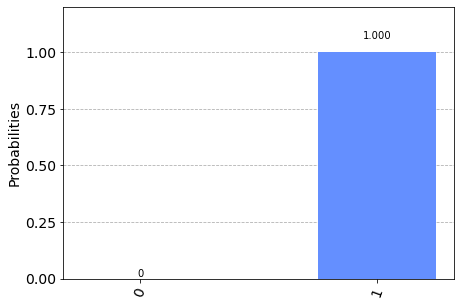

In [10]:
#############################################################################################
########################## DEFINE VARIABLES FOR EXPERIMENTAL SETUP ##########################
#############################################################################################

# size of the scrambling unitary / operator
n = 4

# choose between methods "gateset" and "operator"
method = "gateset"

###### method 1: "gateset" ######
# set two and one qubit gates to be used for scrambling

# define list of two qubit gates for scrambling
two_q_gates = [SwapGate()]

# define list of one qubit gates for scrambling
one_q_gates = [XGate()]

###### method 2: "operator" ###### 
# set unitary for n qubits to be used for scrambling
operator = []

#############################################################################################
########################## STRUCTURE CIRC AND PAIRING #######################################
#############################################################################################

# num of qubits in circuit = 1 q for bob + n*2
qnum = 2*n +1

# inums of upper and lower half qubits
fst_half, sec_half = fst_n_sec_half_nums(qnum)

# initial bell pair inums defining the many-body-system
bell_pairs = get_bell_pairs(qnum)

# list of all bell pairs that can be used as basemeas pair
meas_pairs = [x for x in bell_pairs[:-1]]+[[0,qnum-2]] # replace bob and neighbor with alice and bob neighbor

# alice has qubit 0 - bob has qubit with last inum 
inum_alice, inum_bob = 0, qnum-1

# define qubit pair that will be used for base measurement 
# fist pair in the list is the middle pair (furthes away from bob and alice), but any pair will do
basemeas = meas_pairs[0]

#############################################################################################
########################## GET SCRAMBLING TEST TELPO CIRC  ##################################
#############################################################################################

###################################### STEP 1: PREPARATIONS
#############################################################################################

# initialize circ 
circ = QuantumCircuit(qnum,qnum)

# initialize alice qubit in |1> state
circ.x(inum_alice)

# initialize bell pairs
entangle_bell_pairs(circ, bell_pairs)

###################################### STEP 2: SCRAMBLING PROTOCOL
#############################################################################################

# option 1: apply scrambling via gateset 
if method == "gateset":
    apply_gate_set_test(circ, two_q_gates, one_q_gates)

# option 2: apply scrambling via unitary: 
if method == "unitary":
    apply_unitary_test(circ, unitary)
    
circ.barrier()

###################################### STEP 3: BASE MEASUREMENT OF BELL PAIR
#############################################################################################

# disentangle base meas bell pair
disentangle_bell_pair(circ, basemeas)

###################################### STEP 4: BOB DECODING OF BASE MEASUREMENT
#############################################################################################

# apply decoding from measurement
apply_bob_gates(circ,inum_bob,basemeas)

###################################### STEP 5: BOB MEASUREMENT
#############################################################################################

# measure bob qubit
circ.measure(inum_bob,inum_bob)

#############################################################################################
# see circ
#circ.draw('mpl')

###################################### STEP 6: RUN ON SIMULATOR
#############################################################################################

# choose simulator 
be = qasm_simulator

# run on simulator 
pct = 100
shots = 100*pct
t_qc = transpile(circ, be)
qobj = assemble(t_qc, shots=shots)
result = be.run(qobj).result()

###################################### STEP 7: SEE SIMULATOR RESULTS FOR FIDELITY
#############################################################################################

# see fidelity
bob_1 = sum([v for (k,v) in result.get_counts().items() if k[0]== "1"])
bob_0 = sum([v for (k,v) in result.get_counts().items() if k[0]== "0"])
print("\n Fidelity Bob Qubit:   \t {}%".format(bob_1/pct))
fid_dict = {"1":bob_1,"0":bob_0} # dict for hist plot
plot_histogram(fid_dict)

# Experiment 4: CZGate and SXdgGate


 Fidelity Bob Qubit:   	 0.0%


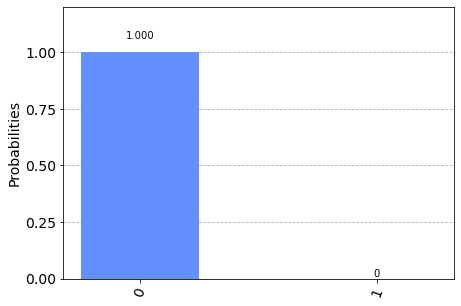

In [11]:
#############################################################################################
########################## DEFINE VARIABLES FOR EXPERIMENTAL SETUP ##########################
#############################################################################################

# size of the scrambling unitary / operator
n = 4

# choose between methods "gateset" and "operator"
method = "gateset"

###### method 1: "gateset" ######
# set two and one qubit gates to be used for scrambling

# define list of two qubit gates for scrambling
two_q_gates = [CZGate()]

# define list of one qubit gates for scrambling
one_q_gates = [SXdgGate()]

###### method 2: "operator" ###### 
# set unitary for n qubits to be used for scrambling
operator = []

#############################################################################################
########################## STRUCTURE CIRC AND PAIRING #######################################
#############################################################################################

# num of qubits in circuit = 1 q for bob + n*2
qnum = 2*n +1

# inums of upper and lower half qubits
fst_half, sec_half = fst_n_sec_half_nums(qnum)

# initial bell pair inums defining the many-body-system
bell_pairs = get_bell_pairs(qnum)

# list of all bell pairs that can be used as basemeas pair
meas_pairs = [x for x in bell_pairs[:-1]]+[[0,qnum-2]] # replace bob and neighbor with alice and bob neighbor

# alice has qubit 0 - bob has qubit with last inum 
inum_alice, inum_bob = 0, qnum-1

# define qubit pair that will be used for base measurement 
# fist pair in the list is the middle pair (furthes away from bob and alice), but any pair will do
basemeas = meas_pairs[0]

#############################################################################################
########################## GET SCRAMBLING TEST TELPO CIRC  ##################################
#############################################################################################

###################################### STEP 1: PREPARATIONS
#############################################################################################

# initialize circ 
circ = QuantumCircuit(qnum,qnum)

# initialize alice qubit in |1> state
circ.x(inum_alice)

# initialize bell pairs
entangle_bell_pairs(circ, bell_pairs)

###################################### STEP 2: SCRAMBLING PROTOCOL
#############################################################################################

# option 1: apply scrambling via gateset 
if method == "gateset":
    apply_gate_set_test(circ, two_q_gates, one_q_gates)

# option 2: apply scrambling via unitary: 
if method == "unitary":
    apply_unitary_test(circ, unitary)
    
circ.barrier()
###################################### STEP 3: BASE MEASUREMENT OF BELL PAIR
#############################################################################################

# disentangle base meas bell pair
disentangle_bell_pair(circ, basemeas)

###################################### STEP 4: BOB DECODING OF BASE MEASUREMENT
#############################################################################################

# apply decoding from measurement
apply_bob_gates(circ,inum_bob,basemeas)

###################################### STEP 5: BOB MEASUREMENT
#############################################################################################

# measure bob qubit
circ.measure(inum_bob,inum_bob)

#############################################################################################
# see circ
#circ.draw('mpl')

###################################### STEP 6: RUN ON SIMULATOR
#############################################################################################

# choose simulator 
be = qasm_simulator

# run on simulator 
pct = 100
shots = 100*pct
t_qc = transpile(circ, be)
qobj = assemble(t_qc, shots=shots)
result = be.run(qobj).result()

###################################### STEP 7: SEE SIMULATOR RESULTS FOR FIDELITY
#############################################################################################

# see fidelity
bob_1 = sum([v for (k,v) in result.get_counts().items() if k[0]== "1"])
bob_0 = sum([v for (k,v) in result.get_counts().items() if k[0]== "0"])
print("\n Fidelity Bob Qubit:   \t {}%".format(bob_1/pct))
fid_dict = {"1":bob_1,"0":bob_0} # dict for hist plot
plot_histogram(fid_dict)

# Experiment 5: CHGate and SXdgGate


 Fidelity Bob Qubit:   	 42.67%


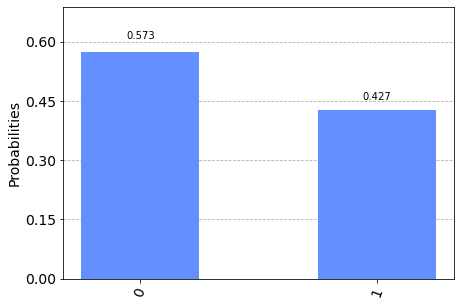

In [12]:
#############################################################################################
########################## DEFINE VARIABLES FOR EXPERIMENTAL SETUP ##########################
#############################################################################################

# size of the scrambling unitary / operator
n = 4

# choose between methods "gateset" and "operator"
method = "gateset"

###### method 1: "gateset" ######
# set two and one qubit gates to be used for scrambling

# define list of two qubit gates for scrambling
two_q_gates = [CHGate()]

# define list of one qubit gates for scrambling
one_q_gates = [SXdgGate()]

###### method 2: "operator" ###### 
# set unitary for n qubits to be used for scrambling
operator = []

#############################################################################################
########################## STRUCTURE CIRC AND PAIRING #######################################
#############################################################################################

# num of qubits in circuit = 1 q for bob + n*2
qnum = 2*n +1

# inums of upper and lower half qubits
fst_half, sec_half = fst_n_sec_half_nums(qnum)

# initial bell pair inums defining the many-body-system
bell_pairs = get_bell_pairs(qnum)

# list of all bell pairs that can be used as basemeas pair
meas_pairs = [x for x in bell_pairs[:-1]]+[[0,qnum-2]] # replace bob and neighbor with alice and bob neighbor

# alice has qubit 0 - bob has qubit with last inum 
inum_alice, inum_bob = 0, qnum-1

# define qubit pair that will be used for base measurement 
# fist pair in the list is the middle pair (furthes away from bob and alice), but any pair will do
basemeas = meas_pairs[0]

#############################################################################################
########################## GET SCRAMBLING TEST TELPO CIRC  ##################################
#############################################################################################

###################################### STEP 1: PREPARATIONS
#############################################################################################

# initialize circ 
circ = QuantumCircuit(qnum,qnum)

# initialize alice qubit in |1> state
circ.x(inum_alice)

# initialize bell pairs
entangle_bell_pairs(circ, bell_pairs)

###################################### STEP 2: SCRAMBLING PROTOCOL
#############################################################################################

# option 1: apply scrambling via gateset 
if method == "gateset":
    apply_gate_set_test(circ, two_q_gates, one_q_gates)

# option 2: apply scrambling via unitary: 
if method == "unitary":
    apply_unitary_test(circ, unitary)
    
circ.barrier()
###################################### STEP 3: BASE MEASUREMENT OF BELL PAIR
#############################################################################################

# disentangle base meas bell pair
disentangle_bell_pair(circ, basemeas)

###################################### STEP 4: BOB DECODING OF BASE MEASUREMENT
#############################################################################################

# apply decoding from measurement
apply_bob_gates(circ,inum_bob,basemeas)

###################################### STEP 5: BOB MEASUREMENT
#############################################################################################

# measure bob qubit
circ.measure(inum_bob,inum_bob)

#############################################################################################
# see circ
#circ.draw('mpl')

###################################### STEP 6: RUN ON SIMULATOR
#############################################################################################

# choose simulator 
be = qasm_simulator

# run on simulator 
pct = 100
shots = 100*pct
t_qc = transpile(circ, be)
qobj = assemble(t_qc, shots=shots)
result = be.run(qobj).result()

###################################### STEP 7: SEE SIMULATOR RESULTS FOR FIDELITY
#############################################################################################

# see fidelity
bob_1 = sum([v for (k,v) in result.get_counts().items() if k[0]== "1"])
bob_0 = sum([v for (k,v) in result.get_counts().items() if k[0]== "0"])
print("\n Fidelity Bob Qubit:   \t {}%".format(bob_1/pct))
fid_dict = {"1":bob_1,"0":bob_0} # dict for hist plot
plot_histogram(fid_dict)

# Experiment 6: RXXGate(theta) and PhaseGate(theta), theta = pi / 2


 Fidelity Bob Qubit:   	 100.0%


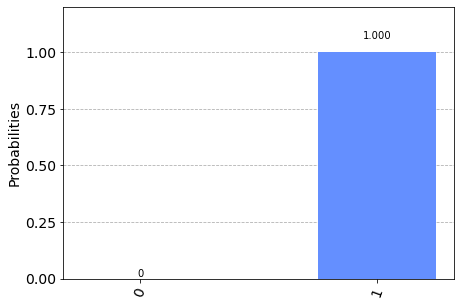

In [13]:
#############################################################################################
########################## DEFINE VARIABLES FOR EXPERIMENTAL SETUP ##########################
#############################################################################################

theta = pi/2

# size of the scrambling unitary / operator
n = 4

# choose between methods "gateset" and "operator"
method = "gateset"

###### method 1: "gateset" ######
# set two and one qubit gates to be used for scrambling

# define list of two qubit gates for scrambling
two_q_gates = [RXXGate(theta)]

# define list of one qubit gates for scrambling
one_q_gates = [PhaseGate(theta)]

###### method 2: "operator" ###### 
# set unitary for n qubits to be used for scrambling
operator = []

#############################################################################################
########################## STRUCTURE CIRC AND PAIRING #######################################
#############################################################################################

# num of qubits in circuit = 1 q for bob + n*2
qnum = 2*n +1

# inums of upper and lower half qubits
fst_half, sec_half = fst_n_sec_half_nums(qnum)

# initial bell pair inums defining the many-body-system
bell_pairs = get_bell_pairs(qnum)

# list of all bell pairs that can be used as basemeas pair
meas_pairs = [x for x in bell_pairs[:-1]]+[[0,qnum-2]] # replace bob and neighbor with alice and bob neighbor

# alice has qubit 0 - bob has qubit with last inum 
inum_alice, inum_bob = 0, qnum-1

# define qubit pair that will be used for base measurement 
# fist pair in the list is the middle pair (furthes away from bob and alice), but any pair will do
basemeas = meas_pairs[0]

#############################################################################################
########################## GET SCRAMBLING TEST TELPO CIRC  ##################################
#############################################################################################

###################################### STEP 1: PREPARATIONS
#############################################################################################

# initialize circ 
circ = QuantumCircuit(qnum,qnum)

# initialize alice qubit in |1> state
circ.x(inum_alice)

# initialize bell pairs
entangle_bell_pairs(circ, bell_pairs)

###################################### STEP 2: SCRAMBLING PROTOCOL
#############################################################################################

# option 1: apply scrambling via gateset 
if method == "gateset":
    apply_gate_set_test(circ, two_q_gates, one_q_gates)

# option 2: apply scrambling via unitary: 
if method == "unitary":
    apply_unitary_test(circ, unitary)
    
circ.barrier()
###################################### STEP 3: BASE MEASUREMENT OF BELL PAIR
#############################################################################################

# disentangle base meas bell pair
disentangle_bell_pair(circ, basemeas)

###################################### STEP 4: BOB DECODING OF BASE MEASUREMENT
#############################################################################################

# apply decoding from measurement
apply_bob_gates(circ,inum_bob,basemeas)

###################################### STEP 5: BOB MEASUREMENT
#############################################################################################

# measure bob qubit
circ.measure(inum_bob,inum_bob)

#############################################################################################
# see circ
#circ.draw('mpl')

###################################### STEP 6: RUN ON SIMULATOR
#############################################################################################

# choose simulator 
be = qasm_simulator

# run on simulator 
pct = 100
shots = 100*pct
t_qc = transpile(circ, be)
qobj = assemble(t_qc, shots=shots)
result = be.run(qobj).result()

###################################### STEP 7: SEE SIMULATOR RESULTS FOR FIDELITY
#############################################################################################

# see fidelity
bob_1 = sum([v for (k,v) in result.get_counts().items() if k[0]== "1"])
bob_0 = sum([v for (k,v) in result.get_counts().items() if k[0]== "0"])
print("\n Fidelity Bob Qubit:   \t {}%".format(bob_1/pct))
fid_dict = {"1":bob_1,"0":bob_0} # dict for hist plot
plot_histogram(fid_dict)